Data Cleaning and preprocessing

In [3]:
#1.Load Dataframe
# we will only use four columns from the original dataset
import pandas as pd
df = pd.read_csv ('movies.csv', encoding='latin1')
df=df[['genres', 'id',"imdb_id","overview"]]  


In [5]:
df.head()


,genres,id,imdb_id,overview
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,"Led by Woody, Andy's toys live happily in his ..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,When siblings Judy and Peter discover an encha...
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,A family wedding reignites the ancient feud be...
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,"Cheated on, mistreated and stepped on, the wom..."
4,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Just when George Banks has recovered from his ...


In [6]:


#drop rows with empty genere
df = df[df.genres != "[]"]
#drop if any of rows with one missing value
df.dropna()
# drop rows with imdb==0
df = df[df.imdb_id != 0]
#create a new column for genres so that genres for each movie is in a list
from ast import literal_eval
df['newgenres'] = df['genres'].apply(literal_eval)
df['newgenres'] =df['newgenres'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
df.head()

,genres,id,imdb_id,overview,newgenres
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]"
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,When siblings Judy and Peter discover an encha...,"[Adventure, Fantasy, Family]"
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,A family wedding reignites the ancient feud be...,"[Romance, Comedy]"
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,"Cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]"
4,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Just when George Banks has recovered from his ...,[Comedy]


In [7]:
df.shape

(43024, 5)

In [8]:

genres = []   ## returns list of lists of genres
import json
# extract genres
for i in df['newgenres']: 
  genres.append(i)
genres

[['Animation', 'Comedy', 'Family'],
 ['Adventure', 'Fantasy', 'Family'],
 ['Romance', 'Comedy'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy'],
 ['Action', 'Crime', 'Drama', 'Thriller'],
 ['Comedy', 'Romance'],
 ['Action', 'Adventure', 'Drama', 'Family'],
 ['Action', 'Adventure', 'Thriller'],
 ['Adventure', 'Action', 'Thriller'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy', 'Horror'],
 ['Family', 'Animation', 'Adventure'],
 ['History', 'Drama'],
 ['Action', 'Adventure'],
 ['Drama', 'Crime'],
 ['Drama', 'Romance'],
 ['Crime', 'Comedy'],
 ['Crime', 'Comedy', 'Adventure'],
 ['Action', 'Comedy', 'Crime'],
 ['Comedy', 'Thriller', 'Crime'],
 ['Drama', 'Thriller'],
 ['Action', 'Adventure', 'Crime', 'Thriller'],
 ['Drama', 'Fantasy', 'Science Fiction', 'Thriller'],
 ['Drama', 'Romance'],
 ['Drama'],
 ['Comedy', 'Drama', 'Family'],
 ['Drama', 'Romance'],
 ['Fantasy', 'Science Fiction', 'Adventure'],
 ['Drama', 'Crime'],
 ['Drama', 'Crime'],
 ['Science Fiction', 'Thriller', 'Mystery'],
 ['Romance

In [9]:

#-----------
from collections import Counter
countlists=Counter(str(e) for e in genres)  # returns counts based on lists of genres
countlists

Counter({"['Animation', 'Comedy', 'Family']": 72,
         "['Adventure', 'Fantasy', 'Family']": 16,
         "['Romance', 'Comedy']": 213,
         "['Comedy', 'Drama', 'Romance']": 593,
         "['Comedy']": 3621,
         "['Action', 'Crime', 'Drama', 'Thriller']": 97,
         "['Comedy', 'Romance']": 930,
         "['Action', 'Adventure', 'Drama', 'Family']": 22,
         "['Action', 'Adventure', 'Thriller']": 59,
         "['Adventure', 'Action', 'Thriller']": 37,
         "['Comedy', 'Horror']": 184,
         "['Family', 'Animation', 'Adventure']": 13,
         "['History', 'Drama']": 95,
         "['Action', 'Adventure']": 93,
         "['Drama', 'Crime']": 174,
         "['Drama', 'Romance']": 1301,
         "['Crime', 'Comedy']": 53,
         "['Crime', 'Comedy', 'Adventure']": 3,
         "['Action', 'Comedy', 'Crime']": 86,
         "['Comedy', 'Thriller', 'Crime']": 5,
         "['Drama', 'Thriller']": 497,
         "['Action', 'Adventure', 'Crime', 'Thriller']": 18,
    

In [10]:

unique = set()

for l in genres:
    unique = unique.union(set(l))
unique  # unique genres  # some of genres are not genres but production names therefore we drop them
unique

{'Action',
 'Adventure',
 'Animation',
 'Aniplex',
 'BROSTA TV',
 'Carousel Productions',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'GoHands',
 'History',
 'Horror',
 'Mardock Scramble Production Committee',
 'Music',
 'Mystery',
 'Odyssey Media',
 'Pulser Productions',
 'Rogue State',
 'Romance',
 'Science Fiction',
 'Sentai Filmworks',
 'TV Movie',
 'Telescene Film Group Productions',
 'The Cartel',
 'Thriller',
 'Vision View Entertainment',
 'War',
 'Western'}

In [11]:

productionname=["Aniplex","BROSTA TV","Carousel Productions","GoHands","Mardock Scramble Production Committee","Odyssey Media","Pulser Productions",
                "Rogue State","Sentai Filmworks","Telescene Film Group Productions","The Cartel","Vision View Entertainment"]

df=df.assign(Cleaned_genres=[[x for x in y if x not in productionname] for y in df.newgenres])
#------------
genres = []   ## returns list of lists of genres
import json
# extract genres
for i in df['Cleaned_genres']: 
    genres.append(i) 

unique = set()

for genre in genres:
    unique = unique.union(set(genre))
#----------------------------------
# remove samples with 0 genre tags
unique

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [12]:
len(unique)

20

In [13]:
df.head()

,genres,id,imdb_id,overview,newgenres,Cleaned_genres
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]","[Animation, Comedy, Family]"
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,When siblings Judy and Peter discover an encha...,"[Adventure, Fantasy, Family]","[Adventure, Fantasy, Family]"
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,A family wedding reignites the ancient feud be...,"[Romance, Comedy]","[Romance, Comedy]"
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,"Cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]","[Comedy, Drama, Romance]"
4,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Just when George Banks has recovered from his ...,[Comedy],[Comedy]


In [14]:
df.loc[df['Cleaned_genres'] == "[]"]
df=df[df['Cleaned_genres'].map(lambda d: len(d)) > 0]

1    14559
2    14480
3     9585
4     3379
5      834
6      157
7       24
8        3
Name: Cleaned_genres, dtype: int64

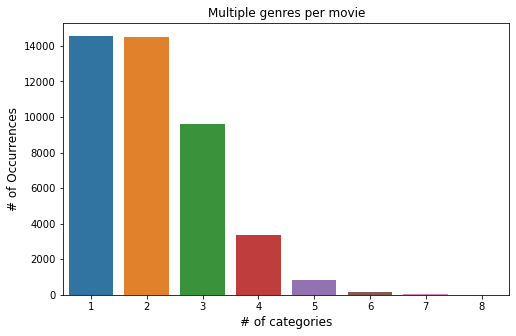

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
rowsums=df.Cleaned_genres.map(len)


x=rowsums.value_counts()#plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple genres per movie")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of categories', fontsize=12)
x

2.	Check if data is balanced or imbalanced

In [16]:
import itertools, collections
# return the number of genres
c = collections.Counter(itertools.chain(*genres))
counters=dict(c)
counters

{'Animation': 1935,
 'Comedy': 13182,
 'Family': 2770,
 'Adventure': 3496,
 'Fantasy': 2313,
 'Romance': 6735,
 'Drama': 20265,
 'Action': 6596,
 'Crime': 4307,
 'Thriller': 7624,
 'Horror': 4673,
 'History': 1398,
 'Science Fiction': 3049,
 'Mystery': 2467,
 'War': 1323,
 'Foreign': 1622,
 'Music': 1598,
 'Documentary': 3932,
 'Western': 1042,
 'TV Movie': 767}

In [17]:
by_count = c.most_common() 
by_count

[('Drama', 20265),
 ('Comedy', 13182),
 ('Thriller', 7624),
 ('Romance', 6735),
 ('Action', 6596),
 ('Horror', 4673),
 ('Crime', 4307),
 ('Documentary', 3932),
 ('Adventure', 3496),
 ('Science Fiction', 3049),
 ('Family', 2770),
 ('Mystery', 2467),
 ('Fantasy', 2313),
 ('Animation', 1935),
 ('Foreign', 1622),
 ('Music', 1598),
 ('History', 1398),
 ('War', 1323),
 ('Western', 1042),
 ('TV Movie', 767)]

In [18]:
total = sum(c.values())
by_freq = [(k, v/total) for k, v in by_count]

In [19]:
by_freq   # percentage of genres and there is an imbalance

[('Drama', 0.2224625112521132),
 ('Comedy', 0.1447076646101829),
 ('Thriller', 0.0836937668781698),
 ('Romance', 0.07393461698904429),
 ('Action', 0.07240872066217315),
 ('Horror', 0.05129865852855292),
 ('Crime', 0.04728083079017279),
 ('Documentary', 0.0431642040090456),
 ('Adventure', 0.03837793927152172),
 ('Science Fiction', 0.03347092014841812),
 ('Family', 0.03040814982325949),
 ('Mystery', 0.027081915384108722),
 ('Fantasy', 0.02539135398599249),
 ('Animation', 0.021241794190616288),
 ('Foreign', 0.01780578303730213),
 ('Music', 0.01754231892330999),
 ('History', 0.015346784640042153),
 ('War', 0.014523459283816717),
 ('Western', 0.011438733615825411),
 ('TV Movie', 0.00841987397633214)]

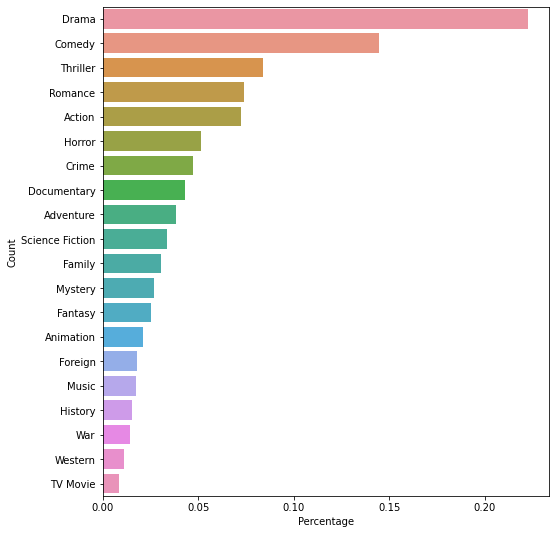

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
df1 = pd.DataFrame(by_freq, columns=["Genre", "Percentage"])
#g = by_freq.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(8,9)) 
ax = sns.barplot(data=df1, x= "Percentage", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()


3.	Data preprocessing for Overview and Transform text to a vector

In [21]:
#Converting Text to Features
from sklearn.preprocessing import MultiLabelBinarizer


In [22]:
df.head()

,genres,id,imdb_id,overview,newgenres,Cleaned_genres
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]","[Animation, Comedy, Family]"
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,When siblings Judy and Peter discover an encha...,"[Adventure, Fantasy, Family]","[Adventure, Fantasy, Family]"
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,A family wedding reignites the ancient feud be...,"[Romance, Comedy]","[Romance, Comedy]"
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,"Cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]","[Comedy, Drama, Romance]"
4,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Just when George Banks has recovered from his ...,[Comedy],[Comedy]


In [23]:
#df['overview'].dtypes
df['overview']=df['overview'].astype(str) # convert df to string


In [24]:
df['overview'].dtypes

dtype('O')

In [25]:
df['overview'][0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

In [26]:
df

,genres,id,imdb_id,overview,newgenres,Cleaned_genres
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]","[Animation, Comedy, Family]"
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,When siblings Judy and Peter discover an encha...,"[Adventure, Fantasy, Family]","[Adventure, Fantasy, Family]"
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,A family wedding reignites the ancient feud be...,"[Romance, Comedy]","[Romance, Comedy]"
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,"Cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]","[Comedy, Drama, Romance]"
4,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Just when George Banks has recovered from his ...,[Comedy],[Comedy]
...,...,...,...,...,...,...
45459,"[{'id': 878, 'name': 'Science Fiction'}]",222848,tt0112613,It's the year 3000 AD. The world's most danger...,[Science Fiction],[Science Fiction]
45460,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",30840,tt0102797,"Yet another version of the classic epic, with ...","[Drama, Action, Romance]","[Drama, Action, Romance]"
45461,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,Rising and falling between a man and woman.,"[Drama, Family]","[Drama, Family]"
45462,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,An artist struggles to finish his work while a...,[Drama],[Drama]


In [27]:
%pip install nltk
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')

     |████████████████████████████████| 1.5 MB 18.4 MB/s eta 0:00:01
     |████████████████████████████████| 745 kB 20.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
from nltk.stem import WordNetLemmatizer
import re

In [29]:
%pip install spacy

     |████████████████████████████████| 5.9 MB 17.7 MB/s eta 0:00:01
     |████████████████████████████████| 456 kB 99.7 MB/s eta 0:00:01
     |████████████████████████████████| 623 kB 89.2 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 107.0 MB/s eta 0:00:01
     |████████████████████████████████| 10.1 MB 100.8 MB/s eta 0:00:01
     |████████████████████████████████| 9.8 MB 91.2 MB/s eta 0:00:01     |███████████████████████████████ | 9.5 MB 91.2 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 10.0 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 36.4 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [30]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [31]:
import nltk
import pandas as pd

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [32]:
def Clean(text):
   
    #remove all punctuation and special characters
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    # remove everything except alphabets 
    #text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    #remove single characters
    text=' '.join([w for w in text.split() if len(w)>1])
    #Lemmatizer
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    

    word_list = nltk.word_tokenize(text)
    text = ' '.join([lemmatizer.lemmatize(w) for w in word_list if w not in stopwords.words('english')])
 
    return text

In [33]:
df["newoverview"]=df['overview'].apply(lambda x : Clean(x))

df["newoverview"]

0        led woody andy toy live happily room andy birt...
1        sibling judy peter discover enchanted board ga...
2        family wedding reignites ancient feud next doo...
3        cheated mistreated stepped woman holding breat...
4        george bank recovered daughter wedding receive...
                               ...                        
45459    year 3000 ad world dangerous woman banished re...
45460    yet another version classic epic enough variat...
45461                             rising falling man woman
45462    artist struggle finish work storyline cult pla...
45463    one hit go wrong professional assassin end sui...
Name: newoverview, Length: 43021, dtype: object

In [34]:
multilabel_binarizer = MultiLabelBinarizer()
#https://towardsai.net/p/latest/predicting-genres-from-movie-dialogue

In [35]:
multilabel_binarizer.fit(df['Cleaned_genres'])


MultiLabelBinarizer()

In [36]:
# transform target variable
y = multilabel_binarizer.transform(df['Cleaned_genres'])

In [37]:
y[0]

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
multilabel_binarizer.classes_

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'], dtype=object)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=1000,ngram_range = (1,2))
tfidf_vectorizer = TfidfVectorizer(min_df=10,max_features=10000,ngram_range = (1,2))

In [40]:
# split dataset into training and validation set
from sklearn.model_selection import train_test_split
X_train, X_test, ytrain, ytest = train_test_split(df['newoverview'], y, test_size=0.2, random_state=9)

In [41]:
# create TF-IDF features
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

#X_train_vec = tfidf_vectorizer.fit_transform(xtrain)
#X_valid_vec = tfidf_vectorizer.transform(xval)

In [42]:
X_train

<34416x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 932166 stored elements in Compressed Sparse Row format>

Model Building

In [43]:
#1 Random forest calssifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
rfClassifier = RandomForestClassifier(n_jobs=-1)
rfClassifier.fit(X_train, ytrain)
rfPreds = rfClassifier.predict(X_test)
f1_score(ytest, rfPreds, average="micro")



0.356000162002349

In [45]:


from sklearn.metrics import accuracy_score
accuracy_score(ytest,rfPreds)



0.16025566531086577

In [46]:
import sklearn.metrics as metrics

metrics.hamming_loss(ytest, rfPreds) #hyperparameter tuning

0.09239395700174317

In [47]:
from sklearn.metrics import classification_report

label_names = multilabel_binarizer.classes_

print(classification_report(ytest, rfPreds,target_names=label_names))

                 precision    recall  f1-score   support

         Action       0.83      0.04      0.08      1305
      Adventure       1.00      0.01      0.01       706
      Animation       0.81      0.03      0.07       378
         Comedy       0.71      0.24      0.36      2660
          Crime       0.56      0.04      0.08       842
    Documentary       0.90      0.39      0.54       812
          Drama       0.63      0.73      0.68      4017
         Family       0.50      0.00      0.01       540
        Fantasy       0.67      0.00      0.01       465
        Foreign       1.00      0.00      0.01       328
        History       0.00      0.00      0.00       291
         Horror       0.77      0.10      0.17       908
          Music       0.58      0.02      0.04       309
        Mystery       0.33      0.00      0.00       478
        Romance       0.68      0.10      0.18      1339
Science Fiction       0.86      0.12      0.21       582
       TV Movie       0.00    

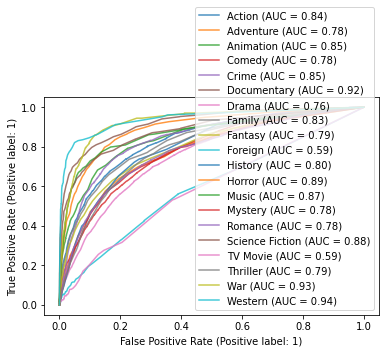

In [48]:
labelPlots ={}
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt  
labelPlots ={}
for i in range (len(label_names)):
  rfClassifier = RandomForestClassifier(n_jobs=-1)
  rfClassifier.fit(X_train, ytrain[:,i])
  ax = plt.gca()
 # labelPlots[i]= plot_roc_curve(rfClassifier, X_test, ytest[:,i], name= ('label_'+str(i)), ax=ax, alpha=0.8) 
  #labelPlots[i]= plot_roc_curve(rfClassifier, X_test, ytest[:,i], name= ('label_'+str(i)), ax=ax, alpha=0.8) 
  labelPlots[i]= plot_roc_curve(rfClassifier, X_test, ytest[:,i], name= (label_names[i]), ax=ax, alpha=0.8) 
  
plt.show()


In [50]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix


In [51]:
conf_mat_dict={}
labels=multilabel_binarizer.classes_
for label_col in range(len(labels)):
    y_true_label = ytest[:, label_col]
    y_pred_label = rfPreds[:, label_col]
    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label)


for label, matrix in conf_mat_dict.items():
    print("Confusion matrix for label {}:".format(label))
    print(matrix)

Confusion matrix for label Action:
[[7289   11]
 [1252   53]]
Confusion matrix for label Adventure:
[[7899    0]
 [ 701    5]]
Confusion matrix for label Animation:
[[8224    3]
 [ 365   13]]
Confusion matrix for label Comedy:
[[5683  262]
 [2027  633]]
Confusion matrix for label Crime:
[[7735   28]
 [ 806   36]]
Confusion matrix for label Documentary:
[[7756   37]
 [ 494  318]]
Confusion matrix for label Drama:
[[2884 1704]
 [1101 2916]]
Confusion matrix for label Family:
[[8063    2]
 [ 538    2]]
Confusion matrix for label Fantasy:
[[8139    1]
 [ 463    2]]
Confusion matrix for label Foreign:
[[8277    0]
 [ 327    1]]
Confusion matrix for label History:
[[8314    0]
 [ 291    0]]
Confusion matrix for label Horror:
[[7671   26]
 [ 819   89]]
Confusion matrix for label Music:
[[8291    5]
 [ 302    7]]
Confusion matrix for label Mystery:
[[8125    2]
 [ 477    1]]
Confusion matrix for label Romance:
[[7201   65]
 [1203  136]]
Confusion matrix for label Science Fiction:
[[8011   12]


In [52]:
conf_mat_dict={}
labels=multilabel_binarizer.classes_
for label_col in range(len(labels)):
    y_true_label = ytest[:, label_col]
    y_pred_label = rfPreds[:, label_col]
    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label,normalize="true")


for label, matrix in conf_mat_dict.items():
    print("Confusion matrix for label {}:".format(label))
    print(matrix)

Confusion matrix for label Action:
[[0.99849315 0.00150685]
 [0.95938697 0.04061303]]
Confusion matrix for label Adventure:
[[1.         0.        ]
 [0.99291785 0.00708215]]
Confusion matrix for label Animation:
[[9.99635347e-01 3.64652972e-04]
 [9.65608466e-01 3.43915344e-02]]
Confusion matrix for label Comedy:
[[0.95592935 0.04407065]
 [0.76203008 0.23796992]]
Confusion matrix for label Crime:
[[0.99639315 0.00360685]
 [0.95724466 0.04275534]]
Confusion matrix for label Documentary:
[[0.99525215 0.00474785]
 [0.60837438 0.39162562]]
Confusion matrix for label Drama:
[[0.62859634 0.37140366]
 [0.27408514 0.72591486]]
Confusion matrix for label Family:
[[9.99752015e-01 2.47985121e-04]
 [9.96296296e-01 3.70370370e-03]]
Confusion matrix for label Fantasy:
[[9.99877150e-01 1.22850123e-04]
 [9.95698925e-01 4.30107527e-03]]
Confusion matrix for label Foreign:
[[1.         0.        ]
 [0.99695122 0.00304878]]
Confusion matrix for label History:
[[1. 0.]
 [1. 0.]]
Confusion matrix for label

In [53]:
#2. Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier
dtClassifier = DecisionTreeClassifier()
dtClassifier.fit(X_train, ytrain)
rfPreds = dtClassifier.predict(X_test)
f1_score(ytest, rfPreds, average="micro")


0.3706929754392202

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,rfPreds)


0.11946542707728065

In [55]:
import sklearn.metrics as metrics

metrics.hamming_loss(ytest, rfPreds) #hyperparameter tuning

0.12342242882045322

In [56]:
from sklearn.metrics import classification_report

label_names = multilabel_binarizer.classes_

print(classification_report(ytest, rfPreds,target_names=label_names))

                 precision    recall  f1-score   support

         Action       0.37      0.26      0.30      1305
      Adventure       0.20      0.14      0.16       706
      Animation       0.22      0.17      0.19       378
         Comedy       0.44      0.42      0.43      2660
          Crime       0.29      0.27      0.28       842
    Documentary       0.53      0.48      0.50       812
          Drama       0.57      0.59      0.58      4017
         Family       0.23      0.17      0.20       540
        Fantasy       0.20      0.14      0.17       465
        Foreign       0.06      0.03      0.04       328
        History       0.10      0.06      0.08       291
         Horror       0.38      0.35      0.36       908
          Music       0.34      0.23      0.27       309
        Mystery       0.16      0.11      0.13       478
        Romance       0.31      0.26      0.28      1339
Science Fiction       0.33      0.26      0.29       582
       TV Movie       0.01    

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
conf_mat_dict={}
labels=multilabel_binarizer.classes_
for label_col in range(len(labels)):
    y_true_label = ytest[:, label_col]
    y_pred_label = rfPreds[:, label_col]
    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label)


for label, matrix in conf_mat_dict.items():
    print("Confusion matrix for label {}:".format(label))
    print(matrix)

Confusion matrix for label Action:
[[6716  584]
 [ 967  338]]
Confusion matrix for label Adventure:
[[7523  376]
 [ 610   96]]
Confusion matrix for label Animation:
[[7999  228]
 [ 313   65]]
Confusion matrix for label Comedy:
[[4511 1434]
 [1534 1126]]
Confusion matrix for label Crime:
[[7203  560]
 [ 616  226]]
Confusion matrix for label Documentary:
[[7440  353]
 [ 420  392]]
Confusion matrix for label Drama:
[[2774 1814]
 [1639 2378]]
Confusion matrix for label Family:
[[7764  301]
 [ 448   92]]
Confusion matrix for label Fantasy:
[[7880  260]
 [ 398   67]]
Confusion matrix for label Foreign:
[[8094  183]
 [ 317   11]]
Confusion matrix for label History:
[[8158  156]
 [ 273   18]]
Confusion matrix for label Horror:
[[7177  520]
 [ 594  314]]
Confusion matrix for label Music:
[[8158  138]
 [ 239   70]]
Confusion matrix for label Mystery:
[[7848  279]
 [ 426   52]]
Confusion matrix for label Romance:
[[6513  753]
 [ 993  346]]
Confusion matrix for label Science Fiction:
[[7711  312]


In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
conf_mat_dict={}
labels=multilabel_binarizer.classes_
for label_col in range(len(labels)):
    y_true_label = ytest[:, label_col]
    y_pred_label = rfPreds[:, label_col]
    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label,normalize="true")


for label, matrix in conf_mat_dict.items():
    print("Confusion matrix for label {}:".format(label))
    print(matrix)

Confusion matrix for label Action:
[[0.92       0.08      ]
 [0.74099617 0.25900383]]
Confusion matrix for label Adventure:
[[0.95239904 0.04760096]
 [0.86402266 0.13597734]]
Confusion matrix for label Animation:
[[0.97228637 0.02771363]
 [0.82804233 0.17195767]]
Confusion matrix for label Comedy:
[[0.7587889  0.2412111 ]
 [0.57669173 0.42330827]]
Confusion matrix for label Crime:
[[0.92786294 0.07213706]
 [0.73159145 0.26840855]]
Confusion matrix for label Documentary:
[[0.95470294 0.04529706]
 [0.51724138 0.48275862]]
Confusion matrix for label Drama:
[[0.60462075 0.39537925]
 [0.40801593 0.59198407]]
Confusion matrix for label Family:
[[0.96267824 0.03732176]
 [0.82962963 0.17037037]]
Confusion matrix for label Fantasy:
[[0.96805897 0.03194103]
 [0.85591398 0.14408602]]
Confusion matrix for label Foreign:
[[0.97789054 0.02210946]
 [0.96646341 0.03353659]]
Confusion matrix for label History:
[[0.98123647 0.01876353]
 [0.93814433 0.06185567]]
Confusion matrix for label Horror:
[[0.932

In [ ]:
labelPlots ={}
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt  
labelPlots ={}
for i in range (len(label_names)):
  
  dtClassifier = DecisionTreeClassifier()
  dtClassifier.fit(X_train,  ytrain[:,i])
  ax = plt.gca()
 
  labelPlots[i]= plot_roc_curve(dtClassifier, X_test, ytest[:,i], name= (label_names[i]), ax=ax, alpha=0.8) 
  
plt.show()



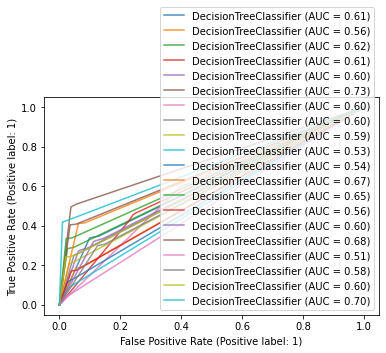

In [60]:
labelPlots ={}
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt  
labelPlots ={}
for i in range (len(label_names)):
  
  dtClassifier = DecisionTreeClassifier()
  dtClassifier.fit(X_train,  ytrain[:,i])
  ax = plt.gca()
 a=0.8) 
  labelPlots[i]= plot_roc_curve(dtClassifier, X_test, ytest[:,i], ax=ax, alpha=0.8) 
  
plt.show()



In [61]:
#3. KNN CLassifier

from sklearn.neighbors import KNeighborsClassifier


knnClf = KNeighborsClassifier()

knnClf.fit(X_train, ytrain)
rfPreds = knnClf.predict(X_test)
f1_score(ytest, rfPreds, average="micro")


0.22356275303643727

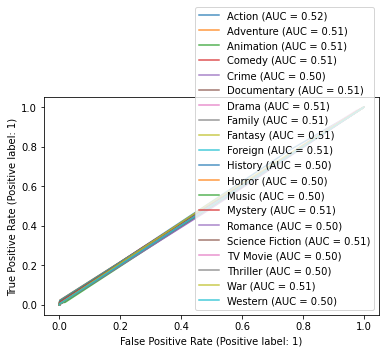

In [62]:
labelPlots ={}
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt  
labelPlots ={}
for i in range (len(label_names)):
  
    knnClf = KNeighborsClassifier()

    knnClf.fit(X_train, ytrain[:,i])
    ax = plt.gca()

    labelPlots[i]= plot_roc_curve(knnClf, X_test, ytest[:,i], name= (label_names[i]), ax=ax, alpha=0.8) 
  

plt.show()



In [64]:
import sklearn.metrics as metrics

metrics.hamming_loss(ytest, rfPreds) #hyperparameter tuning

0.11143521208599651

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,rfPreds)


0.08692620569436374

In [66]:
from sklearn.metrics import classification_report

label_names = multilabel_binarizer.classes_

print(classification_report(ytest, rfPreds,target_names=label_names))

                 precision    recall  f1-score   support

         Action       0.33      0.00      0.00      1305
      Adventure       0.50      0.00      0.00       706
      Animation       1.00      0.01      0.01       378
         Comedy       0.32      0.29      0.31      2660
          Crime       1.00      0.00      0.00       842
    Documentary       1.00      0.00      0.01       812
          Drama       0.47      0.49      0.48      4017
         Family       0.50      0.00      0.00       540
        Fantasy       1.00      0.00      0.00       465
        Foreign       0.00      0.00      0.00       328
        History       0.00      0.00      0.00       291
         Horror       0.00      0.00      0.00       908
          Music       0.00      0.00      0.00       309
        Mystery       0.00      0.00      0.00       478
        Romance       1.00      0.00      0.00      1339
Science Fiction       1.00      0.01      0.01       582
       TV Movie       0.00    

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
conf_mat_dict={}
labels=multilabel_binarizer.classes_
for label_col in range(len(labels)):
    y_true_label = ytest[:, label_col]
    y_pred_label = rfPreds[:, label_col]
    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label,normalize='true')


for label, matrix in conf_mat_dict.items():
    print("Confusion matrix for label {}:".format(label))
    print(matrix)

Confusion matrix for label Action:
[[9.99452055e-01 5.47945205e-04]
 [9.98467433e-01 1.53256705e-03]]
Confusion matrix for label Adventure:
[[9.99873402e-01 1.26598304e-04]
 [9.98583569e-01 1.41643059e-03]]
Confusion matrix for label Animation:
[[1.         0.        ]
 [0.99470899 0.00529101]]
Confusion matrix for label Comedy:
[[0.72632464 0.27367536]
 [0.70864662 0.29135338]]
Confusion matrix for label Crime:
[[1.         0.        ]
 [0.99881235 0.00118765]]
Confusion matrix for label Documentary:
[[1.         0.        ]
 [0.99630542 0.00369458]]
Confusion matrix for label Drama:
[[0.51569311 0.48430689]
 [0.50933532 0.49066468]]
Confusion matrix for label Family:
[[9.99876007e-01 1.23992560e-04]
 [9.98148148e-01 1.85185185e-03]]
Confusion matrix for label Fantasy:
[[1.         0.        ]
 [0.99784946 0.00215054]]
Confusion matrix for label Foreign:
[[1. 0.]
 [1. 0.]]
Confusion matrix for label History:
[[1. 0.]
 [1. 0.]]
Confusion matrix for label Horror:
[[1. 0.]
 [1. 0.]]
Conf

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
conf_mat_dict={}
labels=multilabel_binarizer.classes_
for label_col in range(len(labels)):
    y_true_label = ytest[:, label_col]
    y_pred_label = rfPreds[:, label_col]
    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label)


for label, matrix in conf_mat_dict.items():
    print("Confusion matrix for label {}:".format(label))
    print(matrix)

Confusion matrix for label Action:
[[7296    4]
 [1303    2]]
Confusion matrix for label Adventure:
[[7898    1]
 [ 705    1]]
Confusion matrix for label Animation:
[[8227    0]
 [ 376    2]]
Confusion matrix for label Comedy:
[[4318 1627]
 [1885  775]]
Confusion matrix for label Crime:
[[7763    0]
 [ 841    1]]
Confusion matrix for label Documentary:
[[7793    0]
 [ 809    3]]
Confusion matrix for label Drama:
[[2366 2222]
 [2046 1971]]
Confusion matrix for label Family:
[[8064    1]
 [ 539    1]]
Confusion matrix for label Fantasy:
[[8140    0]
 [ 464    1]]
Confusion matrix for label Foreign:
[[8277    0]
 [ 328    0]]
Confusion matrix for label History:
[[8314    0]
 [ 291    0]]
Confusion matrix for label Horror:
[[7697    0]
 [ 908    0]]
Confusion matrix for label Music:
[[8296    0]
 [ 309    0]]
Confusion matrix for label Mystery:
[[8127    0]
 [ 478    0]]
Confusion matrix for label Romance:
[[7266    0]
 [1338    1]]
Confusion matrix for label Science Fiction:
[[8023    0]


In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
conf_mat_dict={}
labels=multilabel_binarizer.classes_
for label_col in range(len(labels)):
    y_true_label = ytest[:, label_col]
    y_pred_label = rfPreds[:, label_col]
    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label,normalize="true")


for label, matrix in conf_mat_dict.items():
    print("Confusion matrix for label {}:".format(label))
    print(matrix)

Confusion matrix for label Action:
[[9.99452055e-01 5.47945205e-04]
 [9.98467433e-01 1.53256705e-03]]
Confusion matrix for label Adventure:
[[9.99873402e-01 1.26598304e-04]
 [9.98583569e-01 1.41643059e-03]]
Confusion matrix for label Animation:
[[1.         0.        ]
 [0.99470899 0.00529101]]
Confusion matrix for label Comedy:
[[0.72632464 0.27367536]
 [0.70864662 0.29135338]]
Confusion matrix for label Crime:
[[1.         0.        ]
 [0.99881235 0.00118765]]
Confusion matrix for label Documentary:
[[1.         0.        ]
 [0.99630542 0.00369458]]
Confusion matrix for label Drama:
[[0.51569311 0.48430689]
 [0.50933532 0.49066468]]
Confusion matrix for label Family:
[[9.99876007e-01 1.23992560e-04]
 [9.98148148e-01 1.85185185e-03]]
Confusion matrix for label Fantasy:
[[1.         0.        ]
 [0.99784946 0.00215054]]
Confusion matrix for label Foreign:
[[1. 0.]
 [1. 0.]]
Confusion matrix for label History:
[[1. 0.]
 [1. 0.]]
Confusion matrix for label Horror:
[[1. 0.]
 [1. 0.]]
Conf

In [70]:
from functools import partial
def print_evaluation_scores(ytest, rfPreds):
    f1_score_macro = partial(f1_score,average="macro")
    f1_score_micro = partial(f1_score,average="micro")
    f1_score_weighted = partial(f1_score,average="weighted")
    
    average_precision_score_macro = partial(average_precision_score,average="macro")
    average_precision_score_micro = partial(average_precision_score,average="micro")
    average_precision_score_weighted = partial(average_precision_score,average="weighted")
    
    scores = [accuracy_score,f1_score_macro,f1_score_micro,f1_score_weighted,average_precision_score_macro,
             average_precision_score_micro,average_precision_score_weighted]
    for score in scores:
        print(score,score(ytest,rfPreds))
print_evaluation_scores(ytest, rfPreds)

<function accuracy_score at 0x7f8de781b7a0> 0.08692620569436374
functools.partial(<function f1_score at 0x7f8de78213b0>, average='macro') 0.041610839898434074
functools.partial(<function f1_score at 0x7f8de78213b0>, average='micro') 0.22356275303643727
functools.partial(<function f1_score at 0x7f8de78213b0>, average='weighted') 0.15334737525691033
functools.partial(<function average_precision_score at 0x7f8de78cb710>, average='macro') 0.10628649921578719
functools.partial(<function average_precision_score at 0x7f8de78cb710>, average='micro') 0.15275061042691684
functools.partial(<function average_precision_score at 0x7f8de78cb710>, average='weighted') 0.21539980031640457


Onevsrest

In [71]:
#4KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

knnClf = KNeighborsClassifier()
knnClf = OneVsRestClassifier(knnClf)
knnClf.fit(X_train, ytrain)
knnPredictions = knnClf.predict(X_test)
f1_score(ytest, knnPredictions, average="micro")

0.22356275303643727

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
conf_mat_dict={}
labels=multilabel_binarizer.classes_
for label_col in range(len(labels)):
    y_true_label = ytest[:, label_col]
    y_pred_label = knnPredictions[:, label_col]
    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label,normalize='true')


for label, matrix in conf_mat_dict.items():
    print("Confusion matrix for label {}:".format(label))
    print(matrix)

Confusion matrix for label Action:
[[9.99452055e-01 5.47945205e-04]
 [9.98467433e-01 1.53256705e-03]]
Confusion matrix for label Adventure:
[[9.99873402e-01 1.26598304e-04]
 [9.98583569e-01 1.41643059e-03]]
Confusion matrix for label Animation:
[[1.         0.        ]
 [0.99470899 0.00529101]]
Confusion matrix for label Comedy:
[[0.72632464 0.27367536]
 [0.70864662 0.29135338]]
Confusion matrix for label Crime:
[[1.         0.        ]
 [0.99881235 0.00118765]]
Confusion matrix for label Documentary:
[[1.         0.        ]
 [0.99630542 0.00369458]]
Confusion matrix for label Drama:
[[0.51569311 0.48430689]
 [0.50933532 0.49066468]]
Confusion matrix for label Family:
[[9.99876007e-01 1.23992560e-04]
 [9.98148148e-01 1.85185185e-03]]
Confusion matrix for label Fantasy:
[[1.         0.        ]
 [0.99784946 0.00215054]]
Confusion matrix for label Foreign:
[[1. 0.]
 [1. 0.]]
Confusion matrix for label History:
[[1. 0.]
 [1. 0.]]
Confusion matrix for label Horror:
[[1. 0.]
 [1. 0.]]
Conf

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
conf_mat_dict={}
labels=multilabel_binarizer.classes_
for label_col in range(len(labels)):
    y_true_label = ytest[:, label_col]
    y_pred_label = knnPredictions[:, label_col]
    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label)

for label, matrix in conf_mat_dict.items():
    print("Confusion matrix for label {}:".format(label))
    print(matrix)

Confusion matrix for label Action:
[[7296    4]
 [1303    2]]
Confusion matrix for label Adventure:
[[7898    1]
 [ 705    1]]
Confusion matrix for label Animation:
[[8227    0]
 [ 376    2]]
Confusion matrix for label Comedy:
[[4318 1627]
 [1885  775]]
Confusion matrix for label Crime:
[[7763    0]
 [ 841    1]]
Confusion matrix for label Documentary:
[[7793    0]
 [ 809    3]]
Confusion matrix for label Drama:
[[2366 2222]
 [2046 1971]]
Confusion matrix for label Family:
[[8064    1]
 [ 539    1]]
Confusion matrix for label Fantasy:
[[8140    0]
 [ 464    1]]
Confusion matrix for label Foreign:
[[8277    0]
 [ 328    0]]
Confusion matrix for label History:
[[8314    0]
 [ 291    0]]
Confusion matrix for label Horror:
[[7697    0]
 [ 908    0]]
Confusion matrix for label Music:
[[8296    0]
 [ 309    0]]
Confusion matrix for label Mystery:
[[8127    0]
 [ 478    0]]
Confusion matrix for label Romance:
[[7266    0]
 [1338    1]]
Confusion matrix for label Science Fiction:
[[8023    0]


In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,knnPredictions)


0.08692620569436374

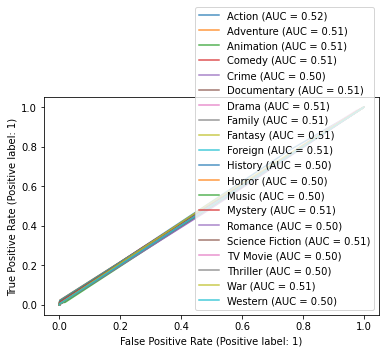

In [75]:
labelPlots ={}
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt  
labelPlots ={}
for i in range (len(label_names)):
  
    #knnClf = KNeighborsClassifier()

    #knnClf.fit(X_train, ytrain[:,i])
    knnClf = KNeighborsClassifier()
    knnClf = OneVsRestClassifier(knnClf)
    knnClf.fit(X_train, ytrain[:,i])
    ax = plt.gca()
 # labelPlots[i]= plot_roc_curve(rfClassifier, X_test, ytest[:,i], name= ('label_'+str(i)), ax=ax, alpha=0.8) 
  #labelPlots[i]= plot_roc_curve(rfClassifier, X_test, ytest[:,i], name= ('label_'+str(i)), ax=ax, alpha=0.8) 
    labelPlots[i]= plot_roc_curve(knnClf, X_test, ytest[:,i], name= (label_names[i]), ax=ax, alpha=0.8) 
  

plt.show()




In [77]:
from sklearn.metrics import classification_report

label_names = multilabel_binarizer.classes_

print(classification_report(ytest, knnPredictions,target_names=label_names))

                 precision    recall  f1-score   support

         Action       0.33      0.00      0.00      1305
      Adventure       0.50      0.00      0.00       706
      Animation       1.00      0.01      0.01       378
         Comedy       0.32      0.29      0.31      2660
          Crime       1.00      0.00      0.00       842
    Documentary       1.00      0.00      0.01       812
          Drama       0.47      0.49      0.48      4017
         Family       0.50      0.00      0.00       540
        Fantasy       1.00      0.00      0.00       465
        Foreign       0.00      0.00      0.00       328
        History       0.00      0.00      0.00       291
         Horror       0.00      0.00      0.00       908
          Music       0.00      0.00      0.00       309
        Mystery       0.00      0.00      0.00       478
        Romance       1.00      0.00      0.00      1339
Science Fiction       1.00      0.01      0.01       582
       TV Movie       0.00    

In [78]:
import sklearn.metrics as metrics

metrics.hamming_loss(ytest, knnPredictions) #hyperparameter tuning

0.11143521208599651

In [79]:
#5 Decision Tress

from sklearn.tree import DecisionTreeClassifier
dtClassifier = DecisionTreeClassifier()
nbClassifier = OneVsRestClassifier(dtClassifier)
nbClassifier.fit(X_train, ytrain)
nbPreds = nbClassifier.predict(X_test)
f1_score(ytest, nbPreds, average="micro")

0.403357466324382

In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
conf_mat_dict={}
labels=multilabel_binarizer.classes_
for label_col in range(len(labels)):
    y_true_label = ytest[:, label_col]
    y_pred_label = nbPreds[:, label_col]
    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label,normalize='true')


for label, matrix in conf_mat_dict.items():
    print("Confusion matrix for label {}:".format(label))
    print(matrix)

Confusion matrix for label Action:
[[0.90287671 0.09712329]
 [0.66590038 0.33409962]]
Confusion matrix for label Adventure:
[[0.94568933 0.05431067]
 [0.82436261 0.17563739]]
Confusion matrix for label Animation:
[[0.97265103 0.02734897]
 [0.71428571 0.28571429]]
Confusion matrix for label Comedy:
[[0.76433978 0.23566022]
 [0.53834586 0.46165414]]
Confusion matrix for label Crime:
[[0.93700889 0.06299111]
 [0.7304038  0.2695962 ]]
Confusion matrix for label Documentary:
[[0.96137559 0.03862441]
 [0.50738916 0.49261084]]
Confusion matrix for label Drama:
[[0.61355711 0.38644289]
 [0.40179238 0.59820762]]
Confusion matrix for label Family:
[[0.95461872 0.04538128]
 [0.77037037 0.22962963]]
Confusion matrix for label Fantasy:
[[0.96584767 0.03415233]
 [0.8172043  0.1827957 ]]
Confusion matrix for label Foreign:
[[0.97704482 0.02295518]
 [0.92682927 0.07317073]]
Confusion matrix for label History:
[[0.97810921 0.02189079]
 [0.87972509 0.12027491]]
Confusion matrix for label Horror:
[[0.942

In [81]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
conf_mat_dict={}
labels=multilabel_binarizer.classes_
for label_col in range(len(labels)):
    y_true_label = ytest[:, label_col]
    y_pred_label = nbPreds[:, label_col]
    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label)

for label, matrix in conf_mat_dict.items():
    print("Confusion matrix for label {}:".format(label))
    print(matrix)

Confusion matrix for label Action:
[[6591  709]
 [ 869  436]]
Confusion matrix for label Adventure:
[[7470  429]
 [ 582  124]]
Confusion matrix for label Animation:
[[8002  225]
 [ 270  108]]
Confusion matrix for label Comedy:
[[4544 1401]
 [1432 1228]]
Confusion matrix for label Crime:
[[7274  489]
 [ 615  227]]
Confusion matrix for label Documentary:
[[7492  301]
 [ 412  400]]
Confusion matrix for label Drama:
[[2815 1773]
 [1614 2403]]
Confusion matrix for label Family:
[[7699  366]
 [ 416  124]]
Confusion matrix for label Fantasy:
[[7862  278]
 [ 380   85]]
Confusion matrix for label Foreign:
[[8087  190]
 [ 304   24]]
Confusion matrix for label History:
[[8132  182]
 [ 256   35]]
Confusion matrix for label Horror:
[[7257  440]
 [ 542  366]]
Confusion matrix for label Music:
[[8122  174]
 [ 208  101]]
Confusion matrix for label Mystery:
[[7809  318]
 [ 403   75]]
Confusion matrix for label Romance:
[[6512  754]
 [ 928  411]]
Confusion matrix for label Science Fiction:
[[7743  280]


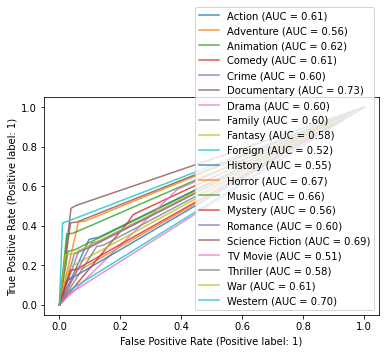

In [82]:
labelPlots ={}
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt  
labelPlots ={}
for i in range (len(label_names)):
    dtClassifier = DecisionTreeClassifier()
    nbClassifier = OneVsRestClassifier(dtClassifier)
    nbClassifier.fit(X_train,  ytrain[:,i])
  
    ax = plt.gca()

    labelPlots[i]= plot_roc_curve(nbClassifier, X_test, ytest[:,i], name= (label_names[i]), ax=ax, alpha=0.8) 
  

plt.show()

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,nbPreds)


0.08588030214991284

In [85]:
import sklearn.metrics as metrics

metrics.hamming_loss(ytest, nbPreds) #hyperparameter tuning

0.12019174898314933

In [86]:
from sklearn.metrics import classification_report

label_names = multilabel_binarizer.classes_

print(classification_report(ytest, nbPreds,target_names=label_names))

                 precision    recall  f1-score   support

         Action       0.38      0.33      0.36      1305
      Adventure       0.22      0.18      0.20       706
      Animation       0.32      0.29      0.30       378
         Comedy       0.47      0.46      0.46      2660
          Crime       0.32      0.27      0.29       842
    Documentary       0.57      0.49      0.53       812
          Drama       0.58      0.60      0.59      4017
         Family       0.25      0.23      0.24       540
        Fantasy       0.23      0.18      0.21       465
        Foreign       0.11      0.07      0.09       328
        History       0.16      0.12      0.14       291
         Horror       0.45      0.40      0.43       908
          Music       0.37      0.33      0.35       309
        Mystery       0.19      0.16      0.17       478
        Romance       0.35      0.31      0.33      1339
Science Fiction       0.46      0.40      0.43       582
       TV Movie       0.04    

In [87]:
#6 Randomforest

classifier = OneVsRestClassifier(RandomForestClassifier())
classifier.fit(X_train, ytrain)
rdPreds = classifier.predict(X_test)
f1_score(ytest, rdPreds, average="micro")

0.39137292011671004

In [88]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
conf_mat_dict={}
labels=multilabel_binarizer.classes_
for label_col in range(len(labels)):
    y_true_label = ytest[:, label_col]
    y_pred_label = rdPreds [:, label_col]
    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label)

for label, matrix in conf_mat_dict.items():
    print("Confusion matrix for label {}:".format(label))
    print(matrix)

Confusion matrix for label Action:
[[7256   44]
 [1150  155]]
Confusion matrix for label Adventure:
[[7893    6]
 [ 690   16]]
Confusion matrix for label Animation:
[[8193   34]
 [ 315   63]]
Confusion matrix for label Comedy:
[[5630  315]
 [1886  774]]
Confusion matrix for label Crime:
[[7727   36]
 [ 806   36]]
Confusion matrix for label Documentary:
[[7761   32]
 [ 494  318]]
Confusion matrix for label Drama:
[[3083 1505]
 [1152 2865]]
Confusion matrix for label Family:
[[8051   14]
 [ 521   19]]
Confusion matrix for label Fantasy:
[[8138    2]
 [ 457    8]]
Confusion matrix for label Foreign:
[[8263   14]
 [ 325    3]]
Confusion matrix for label History:
[[8310    4]
 [ 289    2]]
Confusion matrix for label Horror:
[[7632   65]
 [ 709  199]]
Confusion matrix for label Music:
[[8288    8]
 [ 288   21]]
Confusion matrix for label Mystery:
[[8119    8]
 [ 469    9]]
Confusion matrix for label Romance:
[[7167   99]
 [1191  148]]
Confusion matrix for label Science Fiction:
[[7970   53]


In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
conf_mat_dict={}
labels=multilabel_binarizer.classes_
for label_col in range(len(labels)):
    y_true_label = ytest[:, label_col]
    y_pred_label = rdPreds [:, label_col]
    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label,normalize='true')

for label, matrix in conf_mat_dict.items():
    print("Confusion matrix for label {}:".format(label))
    print(matrix)

Confusion matrix for label Action:
[[0.9939726  0.0060274 ]
 [0.88122605 0.11877395]]
Confusion matrix for label Adventure:
[[9.99240410e-01 7.59589821e-04]
 [9.77337110e-01 2.26628895e-02]]
Confusion matrix for label Animation:
[[0.99586727 0.00413273]
 [0.83333333 0.16666667]]
Confusion matrix for label Comedy:
[[0.9470143  0.0529857 ]
 [0.70902256 0.29097744]]
Confusion matrix for label Crime:
[[0.99536262 0.00463738]
 [0.95724466 0.04275534]]
Confusion matrix for label Documentary:
[[0.99589375 0.00410625]
 [0.60837438 0.39162562]]
Confusion matrix for label Drama:
[[0.67197036 0.32802964]
 [0.28678118 0.71321882]]
Confusion matrix for label Family:
[[0.9982641  0.0017359 ]
 [0.96481481 0.03518519]]
Confusion matrix for label Fantasy:
[[9.99754300e-01 2.45700246e-04]
 [9.82795699e-01 1.72043011e-02]]
Confusion matrix for label Foreign:
[[0.99830857 0.00169143]
 [0.99085366 0.00914634]]
Confusion matrix for label History:
[[9.99518884e-01 4.81116190e-04]
 [9.93127148e-01 6.87285223e

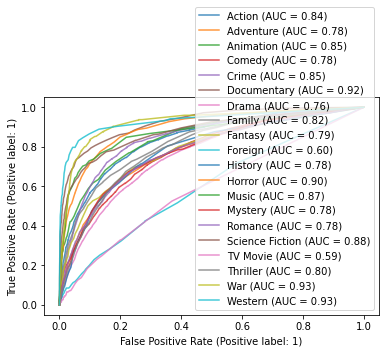

In [90]:
labelPlots ={}
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt  
labelPlots ={}
for i in range (len(label_names)):
    classifier = OneVsRestClassifier(RandomForestClassifier())
    classifier.fit(X_train,  ytrain[:,i])
    
    ax = plt.gca()

    labelPlots[i]= plot_roc_curve(classifier, X_test, ytest[:,i], name= (label_names[i]), ax=ax, alpha=0.8) 
  

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
conf_mat_dict={}
labels=multilabel_binarizer.classes_
for label_col in range(len(labels)):
    y_true_label = ytest[:, label_col]
    y_pred_label = rdPreds [:, label_col]
    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label,normalize='all')

for label, matrix in conf_mat_dict.items():
    print("Confusion matrix for label {}:".format(label))
    print(matrix)

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,rdPreds)


0.16257989540964554

In [93]:
import sklearn.metrics as metrics

metrics.hamming_loss(ytest,rdPreds) #hyperparameter tuning

0.08969203951191168

In [94]:
from sklearn.metrics import classification_report

label_names = multilabel_binarizer.classes_

print(classification_report(ytest,rdPreds,target_names=label_names))

                 precision    recall  f1-score   support

         Action       0.78      0.12      0.21      1305
      Adventure       0.73      0.02      0.04       706
      Animation       0.65      0.17      0.27       378
         Comedy       0.71      0.29      0.41      2660
          Crime       0.50      0.04      0.08       842
    Documentary       0.91      0.39      0.55       812
          Drama       0.66      0.71      0.68      4017
         Family       0.58      0.04      0.07       540
        Fantasy       0.80      0.02      0.03       465
        Foreign       0.18      0.01      0.02       328
        History       0.33      0.01      0.01       291
         Horror       0.75      0.22      0.34       908
          Music       0.72      0.07      0.12       309
        Mystery       0.53      0.02      0.04       478
        Romance       0.60      0.11      0.19      1339
Science Fiction       0.77      0.31      0.44       582
       TV Movie       0.14    